In [75]:
!pip install pyvi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import pandas as pd
from pyvi import ViTokenizer
import re
import string
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from underthesea import word_tokenize
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix, classification_report

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df=pd.read_csv('/content/drive/My Drive/DA2/rating.csv')
df=df[["Column3","Column4"]]
df.columns=['label','text']
df.head()

,label,text
0,1,Áo đẹp lắm giao đúng cỡ mặc thoải mái hài lòng
1,1,Chất liệu: vải mỏng ạ Màu sắc: trắng Đúng vớ...
2,1,Chất liệu: ok Màu sắc: ok Đúng với mô tả: ok...
3,1,Chất liệu: vair gif as ko bieets dduowjc Màu ...
4,1,Hàng hơi rộng Okk mẹ tao nói chuyện với em có...


In [80]:
df["label"]=df["label"].replace(5,0)
df["label"]=df["label"].replace(4,0)
df["label"]=df["label"].replace(3,1)
df["label"]=df["label"].replace(2,1)

In [81]:
seq_len=[len(line) for line in df["text"]]

In [82]:
pd.DataFrame(seq_len).describe()

,0
count,5919.000000
mean,50.476939
std,45.887903
min,1.000000
25%,14.000000
50%,40.000000
75%,73.000000
max,420.000000


In [83]:
df['label'].value_counts()

1    5617
0     302
Name: label, dtype: int64

In [84]:
import string
def clean_document(doc):
    doc = ViTokenizer.tokenize(doc) #Pyvi Vitokenizer library
    doc = doc.lower() #Lower
    tokens = doc.split() #Split in_to words
    table = str.maketrans('', '', string.punctuation.replace("_", "")) #Remove all punctuation
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word]
    return tokens

In [85]:
df['text_token'] = df['text'].apply(clean_document)

In [86]:
df

,label,text,text_token
0,1,Áo đẹp lắm giao đúng cỡ mặc thoải mái hài lòng,"[áo, đẹp, lắm, giao, đúng, cỡ, mặc, thoải_mái,..."
1,1,Chất liệu: vải mỏng ạ Màu sắc: trắng Đúng vớ...,"[chất_liệu, vải, mỏng, ạ, màu_sắc, trắng, đúng..."
2,1,Chất liệu: ok Màu sắc: ok Đúng với mô tả: ok...,"[chất_liệu, ok, màu_sắc, ok, đúng, với, mô_tả,..."
3,1,Chất liệu: vair gif as ko bieets dduowjc Màu ...,"[chất_liệu, vair, gif, as, ko, bieets, dduowjc..."
4,1,Hàng hơi rộng Okk mẹ tao nói chuyện với em có...,"[hàng, hơi, rộng, okk, mẹ, tao, nói_chuyện, vớ..."
...,...,...,...
5914,0,Shop làm việc thái độ tệ với khách hàng10,"[shop, làm_việc, thái_độ, tệ, với, khách, hàng10]"
5915,0,Hàng cc,[hàng_cc]
5916,0,Chửi khách,[chửi_khách]
5917,0,Ko đẹp,[ko_đẹp]


In [87]:
import tensorflow as tf
import pandas as pd
import numpy as np
from string import digits
from collections import Counter
from pyvi import ViTokenizer
from keras.utils.np_utils import to_categorical
%matplotlib inline
import random
from gensim.models import Word2Vec,KeyedVectors

In [88]:
from gensim.topic_coherence.text_analysis import Word2Vec
# CBOW
model_w2v=Word2Vec(df['text_token'],min_count=1,size=300,window=5,sg=0)
model_w2v.build_vocab(df['text_token'],update=True)
model_w2v.train(df['text_token'],total_examples=model_w2v.corpus_count,epochs=300)
model_w2v.save('/content/drive/My Drive/DA2/custom_w2v_bin')

In [125]:
word_vectors = KeyedVectors.load('/content/drive/My Drive/DA2/custom_w2v_bin')

In [126]:
word_vectors.most_similar(positive=['tốt'],topn=10)

<ipython-input-126-18bc79aefc8d>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  word_vectors.most_similar(positive=['tốt'],topn=10)


[('đẹp', 0.5952256917953491),
 ('đúng', 0.5612809062004089),
 ('ok', 0.5571519732475281),
 ('hàng', 0.4923527240753174),
 ('chất_liệu', 0.46627500653266907),
 ('mô_tả', 0.4524180293083191),
 ('đen', 0.4335344433784485),
 ('sản_phẩm', 0.430268257856369),
 ('với', 0.42452627420425415),
 ('giao', 0.4214404821395874)]

In [93]:
EMBEDDING_DIM = 300
MAX_VOCAB_SIZE = 21960
MAX_SEQUENCE_LENGTH = 50

In [94]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [117]:
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE,filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~ ',oov_token='<OOV>')
tokenizer.fit_on_texts(df['text_token'])

In [118]:
sequences_train=tokenizer.texts_to_sequences(df['text_token'])
word_index= tokenizer.word_index

data=pad_sequences(sequences_train,maxlen=MAX_SEQUENCE_LENGTH,truncating='post',padding='post')

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, df['label'], test_size=0.3, random_state=42)

In [98]:
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [120]:
X_train

array([[   6,   26,   13, ...,    0,    0,    0],
       [   4, 2265,  617, ...,  150,   28,  113],
       [   8,    2,   98, ...,    0,    0,    0],
       ...,
       [ 192,    0,    0, ...,    0,    0,    0],
       [  10, 1922,   17, ...,    0,    0,    0],
       [   4,  326,    6, ...,    0,    0,    0]], dtype=int32)

In [121]:
print(X_train.shape)
print(y_train.shape)

(4143, 50)
(4143,)


CNN

In [122]:
from nltk.lm import vocabulary
import gensim
from gensim.models import word2vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

vocabulary_size=min(len(word_index)+1,MAX_VOCAB_SIZE)
vocabulary_size


5482

In [127]:
word_notexist=[]

embedding_matrix=np.zeros((vocabulary_size,EMBEDDING_DIM))

for word,i in word_index.items():
  if i>=MAX_VOCAB_SIZE:
    continue
  try:
    embedding_vector=word_vectors[word]
    embedding_matrix[i]=embedding_vector
  except KeyError :
    try:
      embedding_matrix=np.random.normal(0,np.sqrt(0,25),EMBEDDING_DIM)
      word_notexist.append(word)
    except:
      pass
del(word_vectors)

from keras.layers import Embedding
embedding_layer=Embedding(vocabulary_size,EMBEDDING_DIM,weights=[embedding_matrix],
                          trainable=True)

<ipython-input-127-9f4563703337>:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_vector=word_vectors[word]


In [128]:
from keras.layers import Dense,Input,GlobalMaxPool1D
from keras.layers import Conv1D,MaxPooling1D, Embedding,MaxPooling2D,Flatten,Dropout
from keras.models import Model
from keras.layers import Input,Conv2D,Dropout,concatenate,Reshape
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras import backend as K

import tensorflow as tf

sequence_length=data.shape[1]
filter_sizes=[3,4,5]
num_filters=100
drop=0.5

inputs=Input(shape=(sequence_length,))
embedding=embedding_layer(inputs)
reshape = Reshape((sequence_length,1,EMBEDDING_DIM))(embedding)

conv_0 = Conv2D(num_filters,(filter_sizes[0],1),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters,(filter_sizes[1],1),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv2D(num_filters,(filter_sizes[2],1),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0=MaxPooling2D((sequence_length-filter_sizes[0]+1,1),strides=(1,1))(conv_0)
maxpool_1=MaxPooling2D((sequence_length-filter_sizes[1]+1,1),strides=(1,1))(conv_1)
maxpool_2=MaxPooling2D((sequence_length-filter_sizes[2]+1,1),strides=(1,1))(conv_2)

merged_tensor=concatenate([maxpool_0,maxpool_1,maxpool_2],axis=1)
# merged_tensor=concatenate([maxpool_0],axis=1)
flatten=Flatten()(merged_tensor)
reshape=Reshape((3*num_filters,))(flatten)
dropout=Dropout(drop)(flatten)
output=Dense(units=1,activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)

cnn_model=Model(inputs,output)

ad=tf.keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon='le-08',decay=0.0)
cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 50, 300)      1644600     ['input_3[0][0]']                
                                                                                                  
 reshape_4 (Reshape)            (None, 50, 1, 300)   0           ['embedding_2[0][0]']            
                                                                                                  
 conv2d_6 (Conv2D)              (None, 48, 1, 100)   90100       ['reshape_4[0][0]']              
                                                                                            

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [129]:
cnn_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=16,shuffle=True)
cnn_model.fit(X_train,y_train,epochs=5,batch_size=16,shuffle=True)

Epoch 1/3
259/259 [==============================] - 4s 14ms/step - loss: 4.3495 - accuracy: 0.9471 - val_loss: 10.9436 - val_accuracy: 0.9533
Epoch 2/3
259/259 [==============================] - 3s 11ms/step - loss: 33.6885 - accuracy: 0.9471 - val_loss: 64.7617 - val_accuracy: 0.9533
Epoch 3/3
259/259 [==============================] - 3s 12ms/step - loss: 124.5257 - accuracy: 0.9471 - val_loss: 206.2598 - val_accuracy: 0.9533
Epoch 1/5
259/259 [==============================] - 2s 8ms/step - loss: 378.2116 - accuracy: 0.9471
Epoch 2/5
259/259 [==============================] - 1s 5ms/step - loss: 858.4609 - accuracy: 0.9471
Epoch 3/5
259/259 [==============================] - 1s 5ms/step - loss: 1606.9415 - accuracy: 0.9471
Epoch 4/5
259/259 [==============================] - 1s 5ms/step - loss: 2683.2607 - accuracy: 0.9471
Epoch 5/5
259/259 [==============================] - 1s 5ms/step - loss: 3961.3743 - accuracy: 0.9471


In [132]:
results = cnn_model.evaluate(X_test, y_test, batch_size=16)
print("test loss, test acc:", results)

111/111 [==============================] - 1s 5ms/step - loss: 4716.9355 - accuracy: 0.9533
test loss, test acc: [4716.935546875, 0.9532657861709595]


In [134]:
cnn_model.save("/content/drive/My Drive/DA2/cnn_model")

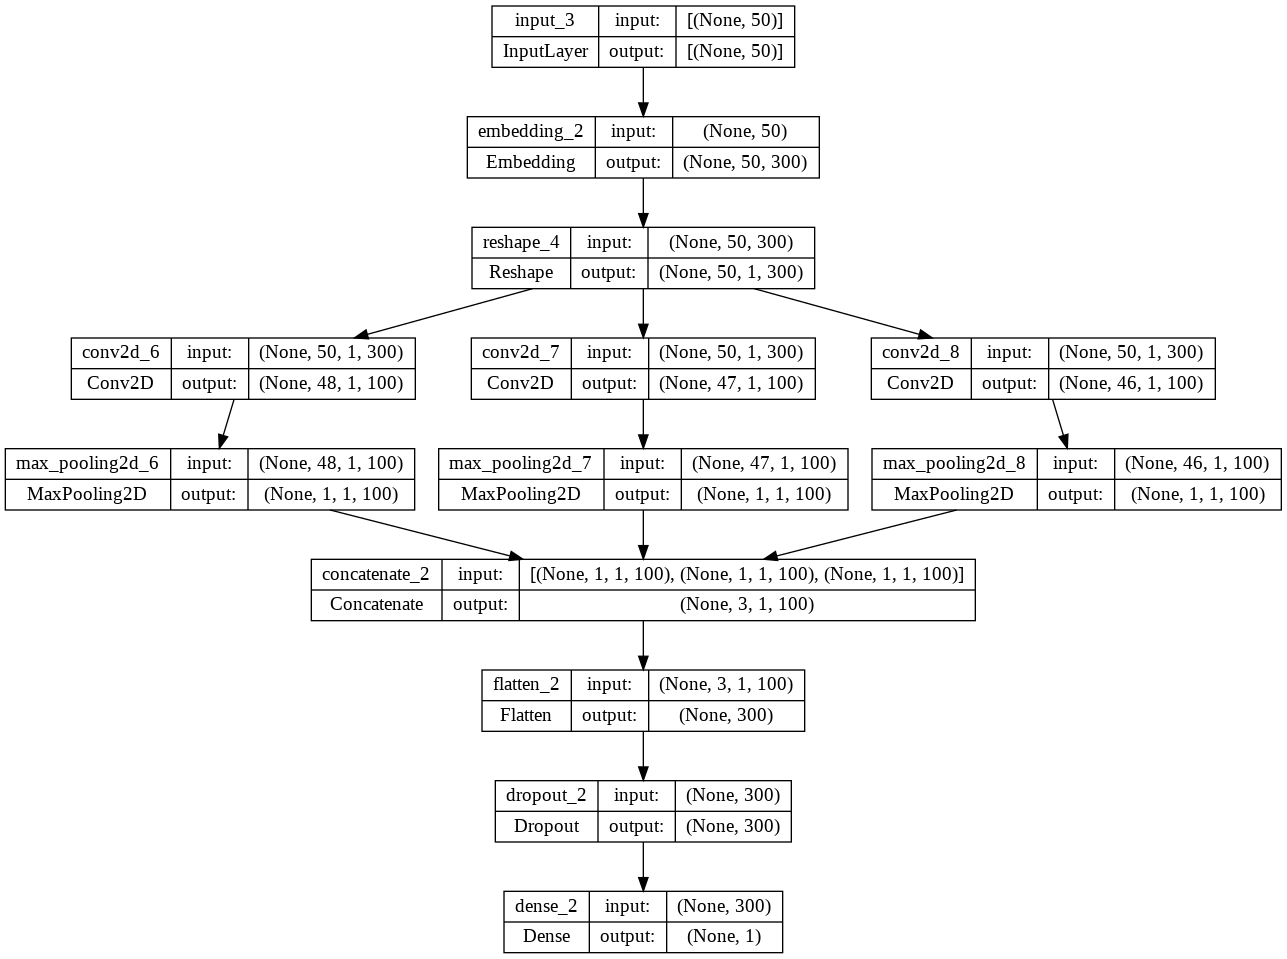

In [135]:
dot_img='/content/drive/My Drive/DA2/model_visualize.png'
tf.keras.utils.plot_model(cnn_model,dot_img,show_shapes=True)

In [136]:
from __future__ import division, print_function
from gensim import models
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from tensorflow.keras.layers import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import os
import collections
import re
import string

SVM

In [137]:
from sklearn.svm import LinearSVC

In [138]:
svm_model =LinearSVC(C=0.1)
svm_model.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.1)

In [139]:
svm_model.score(X_test, y_test)

0.8783783783783784

In [140]:
import pickle
pickle.dump(svm_model, open('/content/drive/My Drive/DA2/svm_model.h', 'wb'))